*Alexis Adrian Carrillo Medina (316733780)*

---
<center> <h1>  <b> Simulacion Estocastica </b> <br>
<b> Tarea 3 </b>
<hr>

#### **Bibliotecas**

In [127]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

### **4) Programe y compare estos estimadores para $\mathbb{E}_{g_X}[X]$ y $Var_{g_X}[X]$ con**
### **$$X|Y=y \sim Normal(0,y) , Y^{-1} \sim Gamma(1,1)$$**

Sea $T=Y^{-1}$, entonces $T \sim Gamma(1,1)$ y $X|T=t \sim Normal(0,\frac{1}{t})$. <br>
Usando la hipotesis del ejercicio obtemos la distribucion de marginal de $X$ <br>

$$f_{X}(x) = \int_{\mathbb{R^+}} f_{X|T}(x|t)g_T(t)dt = \int_{\mathbb{R^+}} \frac{\sqrt{t}}{\sqrt{2 \pi}}e^{-2\frac{x^2 t}{2}} \cdot e^{-t} dt \propto \int_{\mathbb{R^+}} \sqrt{t}e^{-t(\frac{x^2}{2}+1)}dt $$

sea $\xi = t(\frac{x^2}{2}+1) \Rightarrow d\xi =\frac{x^2}{2}+1 dt $, por lo que

$$f_{X}(x) \propto \int_{\mathbb{R^+}} \frac{\sqrt{\xi}}{\sqrt{\frac{x^2}{2}+1}}e^{-\xi} \frac{1}{\frac{x^2}{2}+1} d\xi = \frac{1}{(\frac{x^2}{2}+1)^{\frac{3}{2}}} \int_{\mathbb{R^+}} \sqrt{\xi} e^{-\xi} \propto (\frac{x^2}{2}+1)^{-\frac{3}{2}}$$

por lo tanto $X \sim \mathcal{T}_2$, por lo que $Var_{g_X}(X)=\infty$ y $\mathbb{E}_{g_X}(X)=0$ por lo que instantaneamente se cumple que $Var(E[X|Y])=Var(0)=0 < Var_{g_X}(X) = \infty$

Ahora, simulemos tanto el estimador Rao-Blackwellizado y el estimador Monte-Carlo usual

**Estimador Monte-Carlo Usaul**
$$\frac{1}{n} \sum_{i=1}^n X_i \approx \mathbb{E}(X) $$

In [40]:
def eMonteCarlo(X):
    estimator=0
    for i in range(len(X)):
        estimator+=X[i]
    return estimator/len(X)

**Estimador Rao-Blackwellizado**

$$ \frac{1}{n}\sum_{i=0}^n \mathbb{E}(X|Y_i) \approx \mathbb{E}(X)$$

In [75]:
# En realidad esta funcion la defino porque es proposito de la practica
# Si nos fijamos no tiene sentido porque al final E(X|Y)=0 y el estimador es 0
def eRaoBlackwell(X):
    e=0
    for i in range(len(X)):
        e+=stats.tmean(X)
    return e/len(X)

**Simulacion**

In [125]:
n=500
EstimatorsMU=[]
EstimatorsRB=[]
Iter=[[],[]]
# Variables aleatorias
X = stats.t(2)
Y = stats.gamma(a=1,scale=1)

# Simulacion de las variables
X1=X.rvs(n)
Y1=Y.rvs(n)
for i in range(1,n):
    
    # X|Y=y \sim N(0,y)
    XgivY=[]
    for j in range(len(Y1[0:i])):
        XgivY.append((stats.norm.rvs(0,Y1[j],1))[0])
    EstimatorsMU.append(eMonteCarlo(X1[0:i]))
    EstimatorsRB.append(eRaoBlackwell(XgivY))

**Grafica**

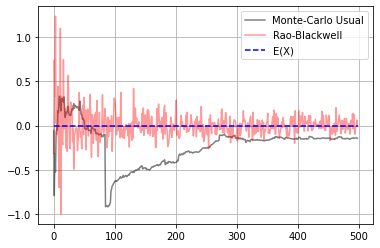

In [134]:
plt.grid()
plt.plot(EstimatorsMU,color='black',label='Monte-Carlo Usual',alpha=0.5)
plt.plot(EstimatorsRB,color='red',label='Rao-Blackwell',alpha=0.4)
plt.plot([0]*n,label='E(X)',ls='--',color='blue')
plt.legend()
plt.show()

Como se puede observar claramente que el Rao-blackwellizado tiene varianza menor que el Monte-Carlo usual, pero el error cuadratico medio no. Aun asi la convergencia se da mas veloz que el Monte-Carlo usual

### **5) Programe 1000 experimentos Monte-Carlo para la estimacion de $\pi$ con nivel de confianza al $95\%$ para estimar correctamente los primeros tres digitos y de el procentaje de los experimentos que dieron correctamente los primeros tres digitos de $\pi$**

#### **Estimacion del numero de muestras e intervalo**

Queremos estimar $\pi$, para ello recordemos que
$$\int_0^1 \sqrt{1-x^2} dx = \frac{\pi}{4}$$
Usaremos integracion montecarlo: estimaremos el area debajo de la curva, entre 0 y 1, de la funcion $h(x)=\sqrt{1-x^2}$<br>
Para ello definimos $Y \sim \mathcal{L}(h(X))$, donde $X \sim U(0,1)$; por la ley de los grandes numeros se tiene:
$$\int_0^1 \sqrt{1-x^2} dx = \mathbb{E}(Y)=\mathbb{E}(h(X)) \approx \frac{1}{n}\sum_{i=1}^n h(X_i) = \hat E$$
donde $X_i \sim \mathcal{L}(X)$. Por el teorema de limite central
$$\lim_{n \to \infty}\sum_{i=0}^n h(X_i) \sim N(n\mathbb{E}(Y),nVar(Y)) $$
Definimos
$$Var(Y) \approx \frac{1}{n}\sum_{i=1}^n (h(X_i) - \hat E)^2 = \hat V^2$$
$$\Rightarrow \frac{\sqrt{n}\left(\hat E-\mathbb{E}(Y)\right)}{\hat V} \sim N(0,1)  $$
Por lo que un intervalo de confianza al $(1-\alpha) \%$ es
$$I_{\alpha}=[\hat E - \frac{Z_{1-\alpha/2}\hat V}{\sqrt{n}},\hat E - \frac{Z_{\alpha/2}\hat V}{\sqrt{n}}] $$
Para $\alpha=0.05$, tenemos
$$I_{\alpha}=[\hat E - \frac{1.96\hat V}{\sqrt{n}},\hat E + \frac{1.96\hat V}{\sqrt{n}}] $$ <br>
Pero este es el intervalo para estimar $\frac{\pi}{4}$; para considerar el intervalo de $\pi$ multiplicamos $\hat E$ por 4 y $\hat V$ por 16, por conveniencia usamos la misma notacion, solo hay que tener encuenta este detalle.<br>
Para asegurarnos que el intervalo de confianza tenga dentro a la estimacion de los primeros 3 digitos de $\pi$, con un $95\%$ de confianza, quisieramos que:
$$ I_{\alpha}=[\hat E - \frac{1.96\hat V}{\sqrt{n}},\hat E + \frac{1.96\hat V}{\sqrt{n}}] \subset [3.14,3,15]$$
Puesto que la distancia de $\pi$ a $3.14,3.15$ es asimetrica tomamos el de menor distancia, dado que, por simetria del intervalo, si tomamos el de menor distancia, para condicionar nuestro intervalo, aseguramos que el otro sea una cota del intervalo. Entonces
$$\Rightarrow 3.14 = \hat E - \frac{1.96\hat V}{\sqrt{n}} \Rightarrow n = \left( \frac{1.96 \hat V}{\pi-3.14} \right)^2$$
Sustituyendo en la $n$ que obtuvimos tenemos que
$$ \hat E + \frac{1.96\hat V}{\sqrt{n}} = 2\pi-3.14 \approx 3.14318 \ldots < 3.15$$
Ahora estimaremos la varianza con python  y para reducirla usamos variables antiteticas

In [21]:
# Funcion h a estimar
def h(x):
    return np.sqrt(1-x**2)

# Numero de sampleos
n=10000

# Variables aleatorias
U=stats.uniform(0,1)

Up=U.rvs(n)
U1=Up
Ua=1-Up

# Esperanza de U1
mean1=0
for i in range(len(U1)):
    mean1+=h(U1[i])
mean1=mean1/n

# Esperanza de Ua
meanA=0
for i in range(len(Ua)):
    meanA+=h(Ua[i])    
meanA=meanA/n

# Varianza de U1
var=0
for i in range(len(U1)):
    var+=(h(U1[i])-mean1)**2    
var=var/n

# Covarianza de U1,Ua
cov=0
for i in range(len(U1)):
    cov+=(h(U1[i])-mean1)*(h(Ua[i])-meanA)
cov=cov/n

print("La varianza, del estimador de pi, es: %f" %((8)*(var+cov)))

La varianza, del estimador de pi, es: 0.105669


Entonces, para tener un experimento que estime los 3 primeros digitos de $\pi$, con un $95 \%$ de confianza, hay que simular un total de:
$$n= \left( \frac{1.96 \cdot \sqrt{0.103627}}{\pi-3.14} \right)^2 \approx 156,943$$
Variables aleatorias, mas la antiteticas, es decir un total de $313,886$ variables aleatorias <br>

#### **Simulacion**

In [7]:
# Cantidad de Montecarlos
N=100

#Cantidad de Variables aleatorias
n=156943

MonteCarlo=[]

for i in range(N):
    #Uniforme
    U=stats.uniform(0,1)
    Up=U.rvs(n)

    U1=Up
    U2=1-Up
    
    mean=0
    for j in range(len(U1)):
        mean+=(h(U1[j])+h(U2[j]))/2
        
    MonteCarlo.append(4*mean/n)

#### **Porcentaje de experimentos**

In [39]:
C=0
for i in range(len(MonteCarlo)):
    if(3.14 <= MonteCarlo[i] and MonteCarlo[i] < 3.15): # con un valor cercano a 3.14318... da un 95% de confianza
        C+=1
print(100*(C/N))

98.0
